# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#dgather">Data Gathering</a></li>
<li><a href="#dassess">Data Assessment</a></li>
    <ul>
        <li><a href="#vassess">Visual Assessment</a></li>
        <li><a href="#passess">Programmatic Assessment</a></li>
    </ul>
<li><a href="#qissues">Quality Issues</a></li>
<li><a href="#tissues">Tidiness Issues</a></li>
<li><a href="#dclean">Data Cleaning</a></li>
<li><a href="#dstore">Data Storing</a></li>
<li><a href="#danalyze">Data Analysis</a></li>
<li><a href="#dvisual">Data Visualization</a></li>
</ul>

### Importing the necessary packages and library

In [406]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a id='dgather'></a>
## Data Gathering

1. **Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [407]:
# twitter_archive_enhanced downloaded manually and read into dataframe

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [408]:
# confirming the dataset was read successfully

twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. **Using the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [5]:
# creating the request

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
# confirming the request was successfully by a 200 response code

response

<Response [200]>

In [7]:
# writing to file

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [8]:
# confirming that the file has been read successfully

os.listdir()

['.ipynb_checkpoints',
 'act_report.ipynb',
 'image-predictions.tsv',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'wrangle_act.ipynb',
 'wrangle_report.ipynb']

In [418]:
# reading in the image_prediction file into dataframe

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [419]:
# confirming that the image_prediction file was read successfully

image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. **Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [ ]:
""""
# Dummy code to get data from twitter using API and tweepy

import tweepy

consumer_key = 'xxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# create a list of the tweet_id 
tweet_ids = ['xxxxxxxxxxxxx', 'xxxxxxxxxxxxx', 'xxxxxxxxxxxxx', 'xxxxxxxxxxxxx']

# creating the file tweet_json.txt
open(tweet-json.txt, 'x', encoding='utf-8')

# loop through the list of tweet_id to get the status of the id and write the content into tweet_json.txt

for tweetid in tweet_ids:
    tweet = api.get_status(tweetid)
    with open('tweet-json.txt', 'a', encoding='utf-8') as file:
        file.write(tweet.content)
        file.close()

""""

In [420]:
# opening the tweet_json file and reading it line by line by parsing it through json_loads

data = [] # creating an empty list for storing dictionary

with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file:
        x = json.loads(line)     # parsing each line to json.loads
        tweet_id = x['id']
        retweet_count = x['retweet_count']
        favorite_count = x['favorite_count']
        
        #creating a dictionary with the extracted data
        data_dict = {
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        }
        
        #appending the dictionary to the list(data)
        data.append(data_dict)

In [421]:
# creating a dataframe of the additional data using the list created above

tweet_extra_data = pd.DataFrame(data)

In [422]:
# confirming the dataframe have been created

tweet_extra_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='dassess'></a>
## Assessing Data


<a id='vassess'></a>
### Visual Assessment

In [423]:
# display the twitter_archive_enhanced table

twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


`twitter-archive-enhanced` columns:
- **tweet_id**: is the integer representation of the unique identifier for each tweet
- **text**: The actual UTF-8 text of the Tweet. See twitter-text for details on what characters are currently considered valid.
- **timestamp**: UTC time when this Tweet was created.
- **in_reply_to_user_id**: *Nullable.* If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.
- **in_reply_to_status_id**: *Nullable.* If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's Id.
- **source**: Utility used to post the Tweet.
- **retweeted_status_id**: represent the id of the retweet
- **retweeted_status_user_id**: represent the id of the user who retweeted it
- **retweeted_status_timestamp**:represent the timestamp of the retweet
- **expanded_urls**: url of the tweet
- **rating_numerator**: The numerator of the rating which ranges from 1-14
- **rating_denominator**: The denominator of the rating number which is the same for all dogs and have value of 10
- **name**: The name of the dog
- **doggo**: is a big pupper, usually older as described in dogtionary
- **floofer**: A dog with seemingly excess fur as described in dogtionary
- **pupper**: A small doggo usually younger as described in dogtionary
- **puppo**: A traditional phase between doggo and pupper in dogtionary


#### Quality Issues:
- 5 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) have missing values
- inconsistent data in expanded_url columns(some url are from twitter, gofundme) and missing urls
- some tweet are reply to tweet and are not original tweet, as shown by 'in_reply_to_status_id' column having **original tweet_id** in it
- some tweet are retweets as the text starts with RT @

In [430]:
# display the image-predictions table

image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


`image_predictions` columns:
- **tweet_id**: is the integer representation of the unique identifier for each tweet
- **jpg_url** : is the url of the image of the image prediction
- **p1**: is the algorithm's #1 prediction for the image in the tweet
- **p1_conf**: is how confident the algorithm is in its #1 prediction
- **p1_dog**: is whether or not the #1 prediction is a breed of dog
- **p2**: is the algorithm's second most likely prediction 
- **p2_conf**: is how confident the algorithm is in its #2 prediction
- **p2_dog**: is whether or not the #2 prediction is a breed of dog

#### Quality Issues:
- non-descriptive column name (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog)


In [431]:
# displaying the tweet_extra_data table

tweet_extra_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


`tweet_extra_data` columns:
- **tweet_id**: is the integer representation of the unique identifier for each tweet
- **retweet_count** : is the number of times the tweet has been retweeted
- **favorite_count** : is the number of times the tweet has been liked by the twitter users

#### Tidiness Issue:
- The columns (retweet_count, favorite_count) belong to the twitter-archive table



<a id='passess'></a>
### Programmatic Assessment


#### Assessing the twitter_archive table programmatically

In [432]:
# Assessing the datatypes of each columns in twitter_archive table

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [433]:
# checking for missing values

twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [434]:
# Checking for duplicated records in the twitter_archive table

twitter_archive.duplicated().sum()

0

In [435]:
# Checking for duplicates in the tweet_id column in twitter_archive table

twitter_archive.duplicated(subset='tweet_id').any()

False

In [436]:
twitter_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
892,759447681597108224,NaN,NaN,2016-07-30 17:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has no idea what happened h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
1100,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*faints* 12/10 perfection in pupper form https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735648611...,12,10,None,None,None,pupper,None
1694,681281657291280384,NaN,NaN,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sarge. His parents signed him up for danc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681281657...,11,10,Sarge,None,None,None,None
2156,669597912108789760,NaN,NaN,2015-11-25 19:25:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skye. He is a Bretwaldian Altostratus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669597912...,10,10,Skye,None,None,None,None
557,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,None,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
764,777953400541634568,NaN,NaN,2016-09-19 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Gerald. He's a fairly exot...,7.681934e+17,4.196984e+09,2016-08-23 21:09:14 +0000,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
2214,668544745690562560,NaN,NaN,2015-11-22 21:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",It is an honor to rate this pup. He is a Snork...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668544745...,10,10,None,None,None,None,None


In [437]:
# checking the number of unique values for the denominator ratings

twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [438]:
# checking the number of unique values for the numerator ratings

twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [439]:
# checking the number of unique values in the doggo dog stage

twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [440]:
# checking the number of unique values in the floofer dog stage

twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [441]:
# checking the number of unique values in the pupper dog stage

twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [442]:
# checking the number of unique values in the puppo dog stage

twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [443]:
# Assessing the summary statistics of the numerical columns in twitter_archive table

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [444]:
twitter_archive['name'].tail(20)

2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345     the
2346     the
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, dtype: object

#### Quality Issues:
- Missing values on columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Incorrect datatypes on columns (timestamp, retweeted_status_timestamp)
- Inaccurate data, rating_denominator greater than 10
- Inaccurate data, rating_numerator greater than 14
- inaccurate dog names (some names are: a, an, the)
- Some tweets are retweets as indicated by RT @ that starts the text
- some dog stages are None

#### Tidiness issues:
- There are four columns of dog stages(doggo, floofer, puppo, pupper) when it should be one variable named dog stage


#### Assessing the image_prediction table programmatically

In [445]:
# assessing the datatypes of the columns

image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [446]:
# checking for duplicates records in the image_prediction table

image_prediction.duplicated().sum()

0

In [447]:
# Checking for duplicates in the tweet_id columns in the image_prediction table

image_prediction.duplicated(subset='tweet_id').any()

False

In [448]:
# checking for missing values in the image_prediction table

image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [449]:
# Assessing the value count of data in the p1 column

image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [450]:
# Assessing the value count of data in the p1_dog column

image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [451]:
# Assessing the summary statistics of the numerical columns in image_prediction table

image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assessing the tweet_extra_data table programmatically

In [452]:
# assessing the datatypes of columns in the tweet_extra_data table

tweet_extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [453]:
# checking for missing data

tweet_extra_data.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [454]:
# checking for duplicated records in tweet_extra_data table

tweet_extra_data.duplicated().sum()

0

In [455]:
# checking for duplicated tweet_id

tweet_extra_data.duplicated(subset='tweet_id').any()

False

In [456]:
# Assessing the summary statistics of the numerical columns in tweet_extra_data table

tweet_extra_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


**After Visual and Programmatic Assessments**

<a id='qissues'></a>
### Quality issues

- **Twitter_archive table**
1. Some tweets are retweets as indicated by RT @ starting the text
2. Some tweet are reply, as shown by 'in_reply_to_status_id' column having **original tweet_id** in it
3. Missing values on columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
4. Missing values on columns (in_reply_to_status_id, in_reply_to_user_id)
5. Incorrect datatypes on columns (timestamp, retweeted_status_timestamp)
6. inaccurate dog names (some names are: a, an, the)
7. inconsistent data in expanded_url columns(some url are from twitter, gofundme) and missing urls 
8. Inaccurate data, some rating_denominator are greater than or less than 10
9. Inaccurate data, some rating_numerator are have extreme values


- **Image_prediction table**
10. non-descriptive column name (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog)

 


<a id='tissues'></a>
### Tidiness issues
1. There are four columns of dog stages(doggo, floofer, puppo, pupper) in twitter_archive table when it should be one variable named dog stage
2. The columns (retweet_count, favorite_count) are attributes of the twitter-archive table
3. There should be one table whereas there are three(3) tables


<a id='dclean'></a>
## Cleaning Data


#### Making Copies of the original data

In [457]:
# Making copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_extra_data_clean = tweet_extra_data.copy()

### Quality Issue #1:
- Some tweets are retweets as indicated by RT @ starting the text

#### Define:

- Filter out only those records where text does not start with RT @

#### Code

In [460]:
# Filtering out only those records where text does not start with RT @

twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['text'].str.startswith('RT @')]

#### Test

In [464]:
# There shouldn't be any row where text starts with RT @

twitter_archive_clean.query('text.str.startswith("RT @")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #2:
- Some tweet are not original tweet, as shown by 'in_reply_to_status_id' column having original tweet_id in it

#### Define
- Filter out only those in which the in_reply_to_status_id is NaN(null) 

#### Code

In [467]:
# Filtering out only those records where in_reply_to_status_id is null

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [468]:
# the column in_reply_to_status_id should all be null values

twitter_archive_clean['in_reply_to_status_id'].notnull().any()

False

### Tidiness Issue1:
- There are four columns of dog stages(doggo, floofer, puppo, pupper) in twitter_archive table when it should be one variable named dog stage

**Define**
 1. First replace None in stage columns with empty string
 2. Then combine stage columns

**Code**

In [469]:
# Replacing the None in the stage columns with empty string

twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

In [470]:
# combining the stages columns into a new column called dog_stage

twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

**Test**

In [471]:
# checking if the column dog_stage have created

twitter_archive_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

**Define**
 - Format entries with multiple dog stages and empty string

**Code**

In [472]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Assigning an unknown value to the empty string
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'unknown'

**Test**

In [473]:
twitter_archive_clean['dog_stage'].value_counts()

unknown           1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

**Define**
 - Drop the four columns(doggo, floofer, pupper and puppo)

**Code**

In [474]:
# Dropping the four dog stages columns

twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test**

In [475]:
# The four dog stages column shouldn't be among the columns displayed below

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  dog_stage                   2097 

### Quality Issue #3:
- Missing values on columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

**Define**
- Drop the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

**Code**

In [476]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [477]:
# The columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp will not be among the columns below

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   2097 non-null   object 
 10  dog_stage              2097 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 147.4+ KB


### Quality Issue #4:
- Missing values on columns (in_reply_to_status_id, in_reply_to_user_id)

**Define**
- Drop the columns in_reply_to_status_id, in_reply_to_user_id

**Code**

In [478]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test**

In [479]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 114.7+ KB


### Quality Issue #5:
- Incorrect datatypes on columns (timestamp, retweeted_status_timestamp)

**Define**
- convert timestamp to datetime datatype
- retweeted_status_timestamp has been drop, so no need to change the datatype

**Code**

In [480]:
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].astype('datetime64')

**Test**

In [481]:
# the timestamp should be a datetime datatype now

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   dog_stage           2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 122.9+ KB


### Quality Issue #6:
- Inaccurate dog names (some names are: a, an, the)

**Define**
- Drop the column "name", since it is not required for analyis

**Code**

In [482]:
# Dropping the name column

twitter_archive_clean.drop('name', axis=1, inplace=True)

**Test**

In [483]:
# There should be no name column in the table

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   dog_stage           2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 114.7+ KB


### Quality Issue #7:
- Inconsistent data in expanded_url columns(some url are from twitter, gofundme) and missing urls

**Define**
- Drop the expanded_url column

**Code**

In [484]:
twitter_archive_clean.drop('expanded_urls', axis=1, inplace=True)

**Test**

In [485]:
# the expanded_urls shouldn't be among the list of columns

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   dog_stage           2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 106.5+ KB


### Quality Issue #8 and #9:
- Inaccurate data, some rating_numerator and rating_denominator are greater than 14 and 10 respectively

**Define**
- Since this a unique rating system for @We_rate_dogs, we will not make any changes

### Quality Issue #10:
- Non-descriptive column name (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog) in image_prediction_clean table

**Define**
- Rename the columns to a descriptive names

**Code**

In [487]:
image_prediction_clean.rename(columns={'p1': 'predict1_name', 
                              'p1_conf': 'predict1_confidence_score', 
                              'p1_dog': 'predict1_likelihood', 
                              'p2': 'predict2_name', 
                              'p2_conf': 'predict2_confidence_score', 
                              'p2_dog': 'predict2_likelihood',
                              'p3': 'predict3_name', 
                              'p3_conf': 'predict3_confidence_score', 
                              'p3_dog': 'predict3_likelihood'}, inplace=True)

**Test**

In [488]:
# The column names has been renamed

image_prediction_clean.head(2)

,tweet_id,jpg_url,img_num,predict1_name,predict1_confidence_score,predict1_likelihood,predict2_name,predict2_confidence_score,predict2_likelihood,predict3_name,predict3_confidence_score,predict3_likelihood
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Tidiness Issue #2:
- The columns (retweet_count, favorite_count) in the tweet_extra_data table are attributes of the twitter-archive table

**Define**
- join the retweet_count and favorite  count to the twitter_archive_clean table

**Code**

In [494]:
# merging the twitter_archive_copy and tweet_extra_data_copy tables

twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_extra_data_clean, how='inner', left_on='tweet_id', right_on='tweet_id')

**Test**

In [495]:
# the retweet_count and favorite_count should be part of the twitter_archive table

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   dog_stage           2097 non-null   object        
 7   retweet_count       2097 non-null   int64         
 8   favorite_count      2097 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 139.3+ KB


### Tidiness Issue #3:
- There should be one table whereas there are three(3) tables

**Define**
- Merge the image_prediction_clean table to the twitter_archive_clean table

**Code**

In [496]:
# Merging the image_prediction_clean to twitter_archive_clean table

twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean, how='inner', left_on='tweet_id', right_on='tweet_id')

**Test**

In [497]:
# The columns in image_prediction_copy table should be in twitter_archive_copy table

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tweet_id                   1971 non-null   int64         
 1   timestamp                  1971 non-null   datetime64[ns]
 2   source                     1971 non-null   object        
 3   text                       1971 non-null   object        
 4   rating_numerator           1971 non-null   int64         
 5   rating_denominator         1971 non-null   int64         
 6   dog_stage                  1971 non-null   object        
 7   retweet_count              1971 non-null   int64         
 8   favorite_count             1971 non-null   int64         
 9   jpg_url                    1971 non-null   object        
 10  img_num                    1971 non-null   int64         
 11  predict1_name              1971 non-null   object        
 12  predic

<a id='dstore'></a>
## Storing Data


In [498]:
# saving the assessed and cleaned data as a master dataset named "twitter_archive_master.csv"

twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='danalyze'></a>
## Analyzing Data


### For Analysis and Visualization, the cleaned and combined *twitter_archive_master* will be used

- Reading in the twitter_archive_master.csv file

In [503]:
# Reading in the twitter_archive_master dataset into df_tweet DataFrame

df_tweet = pd.read_csv('twitter_archive_master.csv', parse_dates=['timestamp'])

In [501]:
# checking the twitter_archive_master has been loaded into the df_tweet

df_tweet.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count,jpg_url,img_num,predict1_name,predict1_confidence_score,predict1_likelihood,predict2_name,predict2_confidence_score,predict2_likelihood,predict3_name,predict3_confidence_score,predict3_likelihood
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,unknown,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Insights:
1. Which year has the highest number of Dog tweets?

2. What is the most popular rating for dogs?

3. Which dog rating has the highest number of retweets?

4. Which dog rating has the highest number of likes?

5. Which dog is most favorite (based on Prediction1_name)?

6. Which dog_name is most predicted and how accurate is prediction 1 algorithm?

7. What is the distribution of dog_ratings, favorite_count and retweet_count

8. Is likes associated with retweet





### Insight1: Which year has the highest number of Dog tweets?

In [505]:
# creating a year column which will be used for analysis

df_tweet['year'] = df_tweet['timestamp'].dt.year

In [507]:
# The code shows the total dog_rates(tweets) by year

(df_tweet.groupby('year')
    .agg(number_of_tweets=('tweet_id', 'count'))
    .sort_values('number_of_tweets', ascending=False))

,number_of_tweets
year,
2016,962
2015,655
2017,354


### Insight2: What is the most popular rating for dogs?

In [508]:
# The code shows the popular ratings by year

(df_tweet.groupby(['year', 'rating_numerator'])
    .agg(total = ('tweet_id', 'count'))
    .sort_values(['year', 'total'], ascending=[True, False]))

total
year rating_numerator       
2015 10                  192
     11                  104
     9                    89
     12                   75
     8                    66
     7                    33
     5                    24
     6                    22
     3                    12
     13                   12
     2                     9
     4                     8
     1                     5
     26                    1
     88                    1
     144                   1
     420                   1
2016 11                  253
     12                  243
     10                  222
     13                   81
     9                    61
     8                    29
     7                    19
     6                     9
     14                    9
     4                     8
     5                     8
     3                     7
     24                    1
     27                    1
     44                    1
     45                    1
     50                    1
     60                    1
     75                    1
     80                    1
     99                    1
     121                   1
     165                   1
     204                   1
     1776                  1
2017 13                  160
     12                  128
     11                   35
     14                   24
     10                    3
     0                     1
     5                     1
     6                     1
     84                    1

### Insight3: Which dog rating has the highest number of retweets

In [509]:
# The code shows the rating by total retweets by year

(df_tweet.groupby(['year', 'rating_numerator'])
    .agg(retweet_mean = ('retweet_count', 'mean'))
    .sort_values(['year', 'retweet_mean'], ascending=[True, False]))

retweet_mean
year rating_numerator              
2015 13                 4880.666667
     420                4324.000000
     1                  2512.200000
     12                 1644.626667
     11                 1483.846154
     88                 1460.000000
     2                  1350.333333
     4                  1130.125000
     144                1104.000000
     10                  908.557292
     3                   871.583333
     6                   718.954545
     5                   696.708333
     8                   674.530303
     7                   600.696970
     26                  542.000000
     9                   524.674157
2016 14                 9096.111111
     13                 7560.148148
     75                 7069.000000
     12                 2844.930041
     1776               2772.000000
     7                  2604.947368
     165                2539.000000
     11                 2292.905138
     5                  2110.875000
     10                 1974.761261
     27                 1885.000000
     24                 1655.000000
     6                  1570.555556
     121                1563.000000
     44                 1552.000000
     204                1434.000000
     8                  1428.551724
     9                  1360.426230
     4                  1163.500000
     3                  1091.428571
     60                 1028.000000
     99                  829.000000
     45                  721.000000
     80                  636.000000
     50                  247.000000
2017 5                 10407.000000
     14                10081.791667
     13                 7054.250000
     10                 6576.000000
     12                 4578.125000
     11                 3857.314286
     84                 3716.000000
     6                  3444.000000
     0                  3443.000000

### Insight4: Which dog rating has the highest number of likes

In [510]:
# The code shows the rating by total likes by year

(df_tweet.groupby(['year', 'rating_numerator'])
    .agg(likes_mean = ('favorite_count', 'mean'))
    .sort_values(['year', 'likes_mean'], ascending=[True, False]))

likes_mean
year rating_numerator              
2015 13                10907.500000
     420                7989.000000
     1                  5599.800000
     12                 3824.893333
     11                 3391.028846
     144                3323.000000
     88                 2927.000000
     2                  2256.777778
     10                 2140.145833
     4                  1918.625000
     26                 1879.000000
     3                  1703.083333
     8                  1627.878788
     5                  1599.375000
     7                  1502.545455
     6                  1426.727273
     9                  1394.370787
2016 14                22537.111111
     75                20296.000000
     13                17675.419753
     12                 8731.316872
     27                 7320.000000
     11                 6978.909091
     7                  6865.736842
     24                 5927.000000
     5                  5639.875000
     10                 5572.153153
     1776               5569.000000
     165                5316.000000
     8                  4324.000000
     121                4225.000000
     6                  4215.222222
     9                  4203.032787
     204                4196.000000
     4                  3767.250000
     44                 3748.000000
     3                  3582.571429
     60                 3201.000000
     99                 3062.000000
     45                 2634.000000
     50                 2574.000000
     80                 2529.000000
2017 5                 46860.000000
     14                32731.125000
     13                26965.543750
     10                26304.666667
     0                 24574.000000
     12                20706.656250
     6                 17618.000000
     11                16978.371429
     84                13518.000000

### Insight5: Which dog is most favorite (based on Prediction1_name)

In [511]:
# The code below shows the top 10 most liked dog based on prediction1_name

(df_tweet.groupby('predict1_name')
    .agg(total_count = ('tweet_id', 'count'),
        total_likes = ('favorite_count', 'sum'))
    .sort_values('total_likes', ascending=False)).head(10)

,total_count,total_likes
predict1_name,,
golden_retriever,137,1693475
Labrador_retriever,94,1116811
Pembroke,88,994755
Chihuahua,78,673526
Samoyed,40,542991
French_bulldog,26,465738
chow,41,404241
pug,54,320223
cocker_spaniel,27,315825


### Insight6: which dog_name is most predicted and how accurate is prediction 1 algorithm

In [512]:
(df_tweet.groupby('predict1_name')
    .agg(total_count=('predict1_name', 'count'), 
         confidence_mean=('predict1_confidence_score', 'mean'))
    .sort_values(['total_count', 'confidence_mean'], ascending=[False, False])
     .head(10))

,total_count,confidence_mean
predict1_name,,
golden_retriever,137,0.728116
Labrador_retriever,94,0.656606
Pembroke,88,0.717223
Chihuahua,78,0.587447
pug,54,0.759223
chow,41,0.615648
Samoyed,40,0.747088
Pomeranian,38,0.743606
toy_poodle,37,0.611089


<a id='dvisual'></a>
## Visualization

### Distribution of rating_numerator

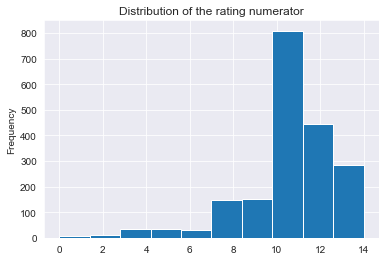

In [522]:
# Plotting the distribution of numerator ratings that are below 15

(df_tweet.query('rating_numerator <=15')['rating_numerator']
    .plot(kind='hist', title='Distribution of the rating numerator'));

### Distribution of favorite_count

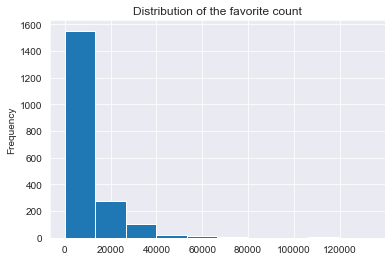

In [514]:
# checking the distribution of favorite_count

df_tweet['favorite_count'].plot(kind='hist', title='Distribution of the favorite count');

### Distribution of retweet_count

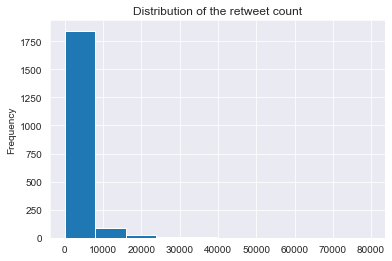

In [515]:
# checking the distribution of retweet_count

df_tweet['retweet_count'].plot(kind='hist', title='Distribution of the retweet count');

### Insight8: Is Likes associated with retweets

Text(0, 0.5, 'retweet_count')

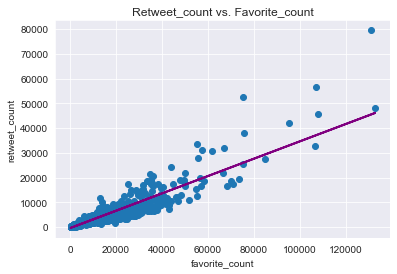

In [529]:
x = df_tweet['favorite_count']
y = df_tweet['retweet_count']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), color="purple", linewidth=2)
plt.title('Retweet_count vs. Favorite_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

In [530]:
# Calculating the correlation coeffient between favorite_count and retweet_count

df_tweet['retweet_count'].corr(df_tweet['favorite_count'])

0.9130143486107427